In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit
import uncertainties.unumpy as un

import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 6 - Cavitação valv. descarga/dados.xlsx', sheet_name='instru')
#Info medidas -> var pressão
df_med = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 6 - Cavitação valv. descarga/dados.xlsx')

#Incerteza do tipo A
ze = fk.incert_A(df_inst.ze.values) / 100  #m
zs = fk.incert_A(df_inst.zs.values) / 100
De = fk.incert_A(df_inst.De.values) / 1000
Ds = fk.incert_A(df_inst.Ds.values) / 1000
Drot = fk.incert_A(df_inst.D.values) / 100

#Incerteza do tipo B - a/raiz(3)
pe = un.uarray(df_med.pe.values, (df_med.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
ps = un.uarray(df_med.ps.values, (df_med.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
Q = un.uarray(df_med.Q.values, (df_med.Q.values*0.02)/np.sqrt(3)) #m^3/h
w = un.uarray(df_med.w.values, (df_med.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Fox dados -> agua
pv = 3.17e3 #Pa [pressão de vapor a 25ºC]

def func_cavitation(Pe, Ve):
    Pa = Pe + 101325 #Pa
    return (Pa - pv)/(fk.rho_agua*fk.g) + (Ve**2)/2*fk.g

In [24]:
b1  = fk.bomba(pe, ps, fk.Q2v(Q, De), fk.Q2v(Q, Ds), ze, zs)

### Calculando NSPH para cavitação

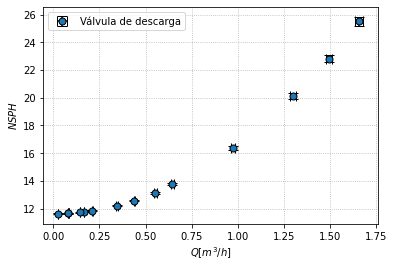

In [25]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$NSPH$', xlabel=r'$Q [m^3/h]$')

NSPH = func_cavitation(pe, fk.Q2v(Q, De))

fk.error(fk.Q2v(Q, De), NSPH, 'o', 'Válvula de descarga', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Q_x_NSPH.pdf', bbox_inches='tight')

In [26]:
print(pd.DataFrame({'Q':fk.Q2v(Q, De), 'NPSH':NSPH}))

                    Q          NPSH
0       1.658+/-0.019  25.53+/-0.32
1       1.496+/-0.017  22.82+/-0.26
2       1.299+/-0.015  20.12+/-0.20
3       0.973+/-0.011  16.38+/-0.12
4       0.646+/-0.008  13.78+/-0.07
5       0.554+/-0.006  13.14+/-0.06
6       0.440+/-0.005  12.59+/-0.05
7       0.345+/-0.004  12.22+/-0.05
8     0.2101+/-0.0025  11.86+/-0.05
9     0.1661+/-0.0019  11.78+/-0.05
10    0.1436+/-0.0017  11.74+/-0.05
11    0.0812+/-0.0009  11.67+/-0.05
12    0.0812+/-0.0009  11.67+/-0.05
13  0.02620+/-0.00031  11.64+/-0.05


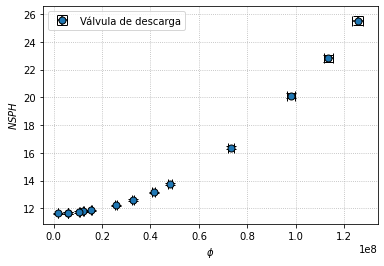

In [27]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$NSPH$', xlabel=r'$\phi$')

fk.error(b1.phi(Q, w, De), NSPH, 'o', 'Válvula de descarga', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Q_x_NSPH.pdf', bbox_inches='tight')

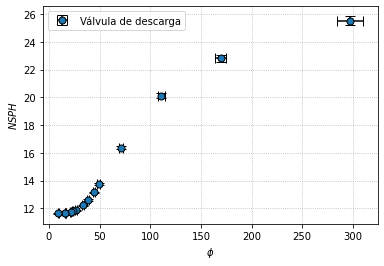

In [28]:
fig, ax = plt.subplots()
ax.set(ylabel=r'$NSPH$', xlabel=r'$\phi$')

fk.error(b1.nq_m(Q, w), NSPH, 'o', 'Válvula de descarga', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('Q_x_NSPH.pdf', bbox_inches='tight')